In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Netflix Data Analysis

This project explores trends and insights within Netflix's dataset to identify patterns, top contributors, and key content strategies. It leverages Python for data manipulation and visualization, providing actionable recommendations.



Project Objectives

Analyze release patterns to uncover yearly and monthly trends.
Identify top contributors such as directors and cast members.
Understand genre distributions and their correlation with countries.
Explore ratings and their relationship with genres.

Tools and Libraries Used

Python: Primary programming language.
Pandas: Data manipulation and cleaning.
Matplotlib and Seaborn: Visualization.


Steps and Code

1. Dataset Overview

    We load the Netflix dataset and inspect it for structure, missing values, and duplicates.

In [2]:

df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

In [3]:

df.info()  
df.isnull().sum() 
#df.dropna(inplace=True) 
df.drop_duplicates(inplace=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  tescription   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

2. Data Cleaning

    Columns irrelevant to the analysis are dropped, and key fields are cleaned for consistency.

Removing Unwanted Ratings

Certain values in the "rating" column, such as runtime durations ("66 min", "74 min", "84 min") and other non-standard ratings like "NR" (Not Rated) and "UR" (Unrated), were deemed irrelevant for analysis. These entries were removed to maintain the quality and relevance of the dataset.

In [4]:

columns_to_drop = ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 
                   'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 
                   'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:

unwanted_ratings = ["66 min", "74 min", "84 min", "NR", "UR"]

df = df[~df['rating'].isin(unwanted_ratings)]

df.reset_index(drop=True, inplace=True)

print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'TV-Y7-FV' 'A']


In [6]:

df['type'] = df['type'].str.strip().str.lower().str.title()
df['listed_in'] = df['listed_in'].str.strip().str.title()
df.dropna(inplace=True)

3. Yearly Release Trend

    Visualizing the number of titles released each year.

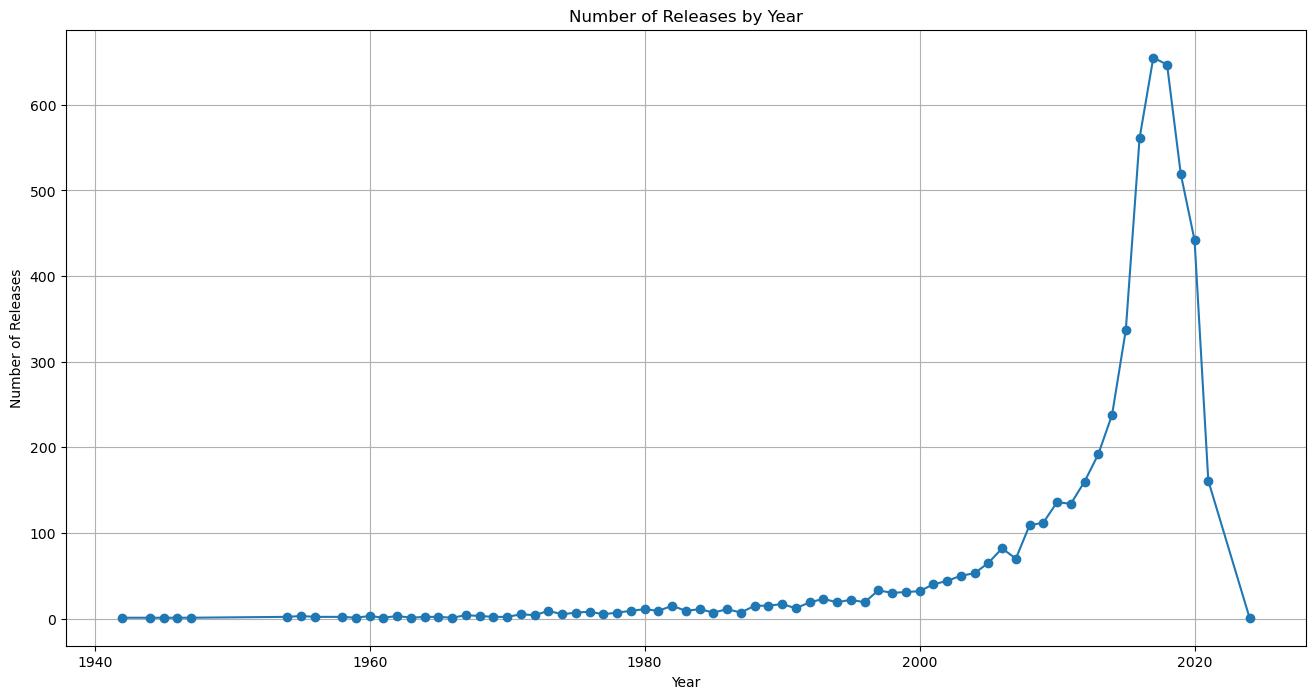

In [7]:

release_year_data = df.groupby('release_year').size()
plt.figure(figsize=(16, 8))
plt.plot(release_year_data.index, release_year_data.values, marker='o')
plt.title("Number of Releases by Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()

4. Monthly Release Trend

    Visualizing when titles are added to Netflix throughout the year.

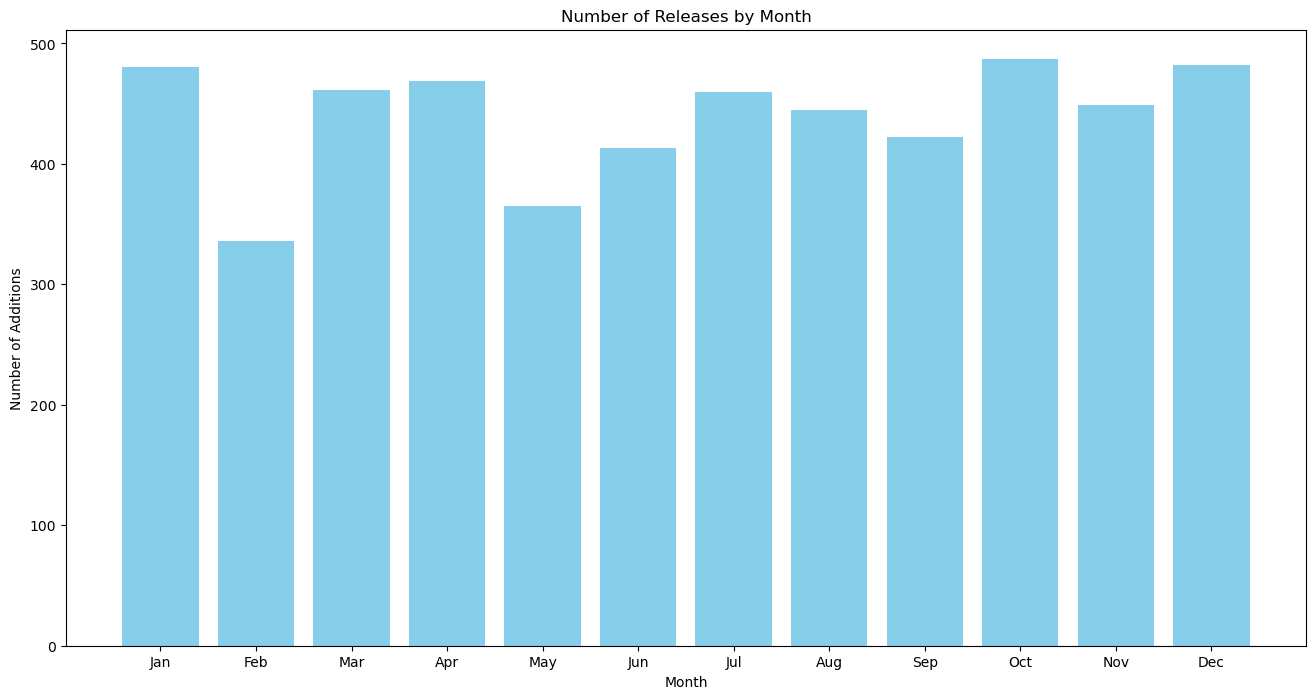

In [8]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
monthly_data = df.groupby('month_added').size()
plt.figure(figsize=(16, 8))
plt.bar(monthly_data.index, monthly_data.values, color="skyblue")
plt.title("Number of Releases by Month")
plt.xlabel("Month")
plt.ylabel("Number of Additions")
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

5. Top Contributors

    Top 10 Directors

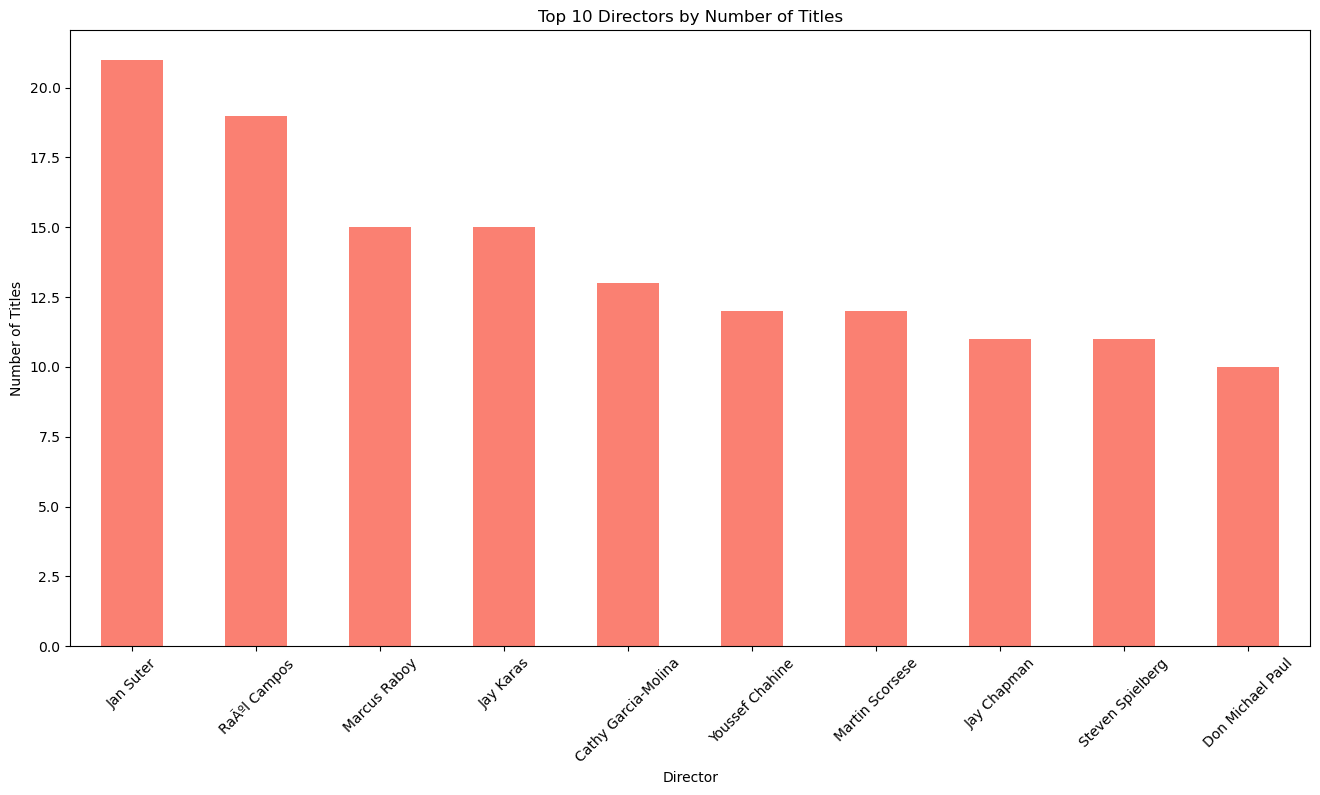

In [9]:

directors_series = df['director'].str.split(',').explode().str.strip()
top_directors = directors_series.value_counts().head(10)
plt.figure(figsize=(16, 8))
top_directors.plot(kind='bar', color='salmon')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


Top 10 Cast Members


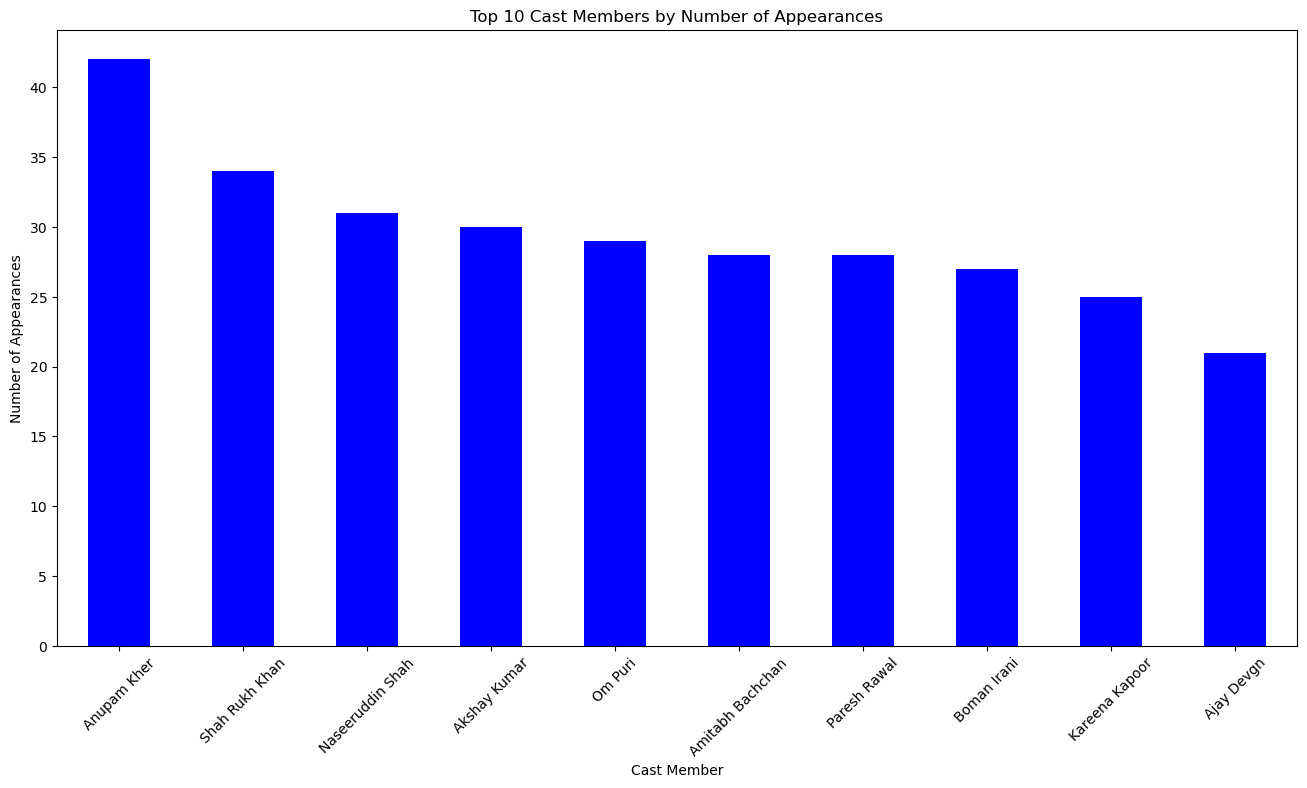

In [10]:

cast_series = df['cast'].str.split(',').explode().str.strip()
top_cast = cast_series.value_counts().head(10)
plt.figure(figsize=(16, 8))
top_cast.plot(kind='bar', color='blue')
plt.title("Top 10 Cast Members by Number of Appearances")
plt.xlabel("Cast Member")
plt.ylabel("Number of Appearances")
plt.xticks(rotation=45)
plt.show()

6. Genre-Specific Analysis

    Top Directors in Specific Genres

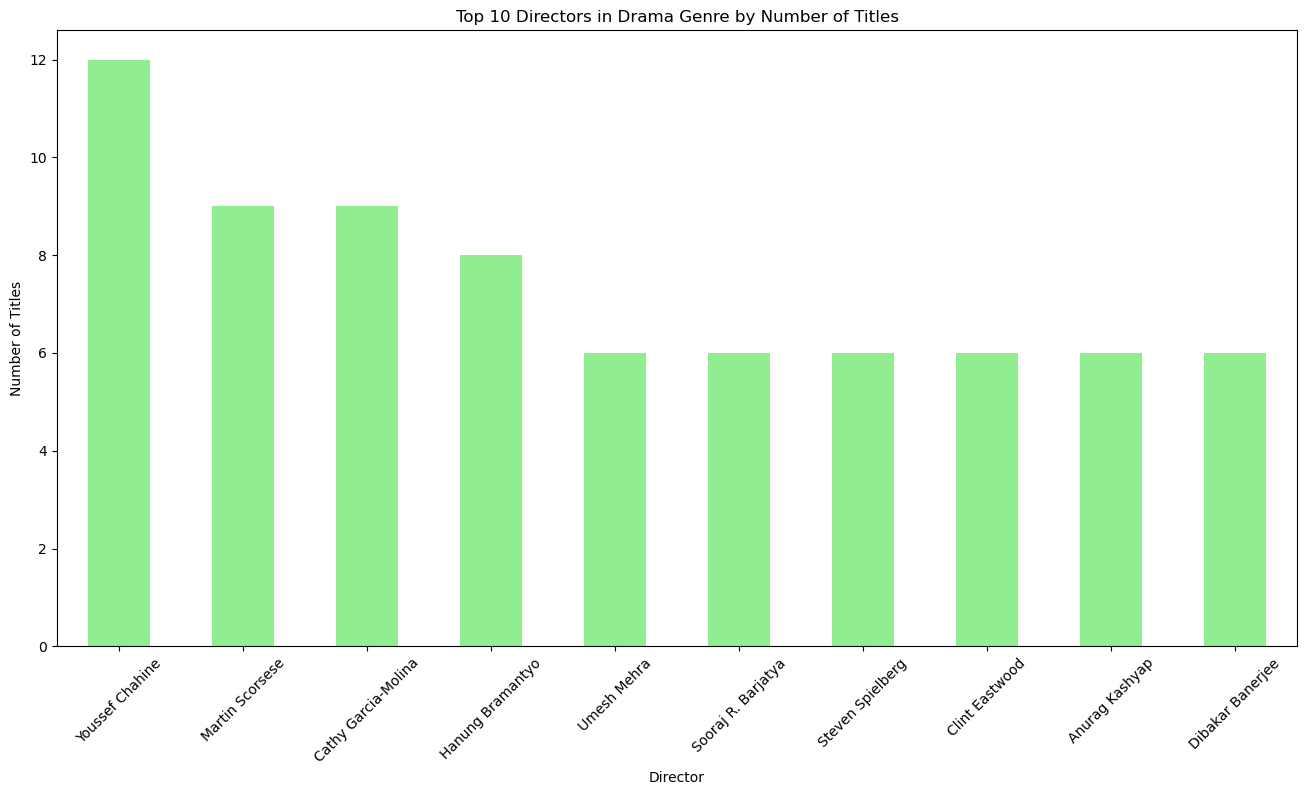

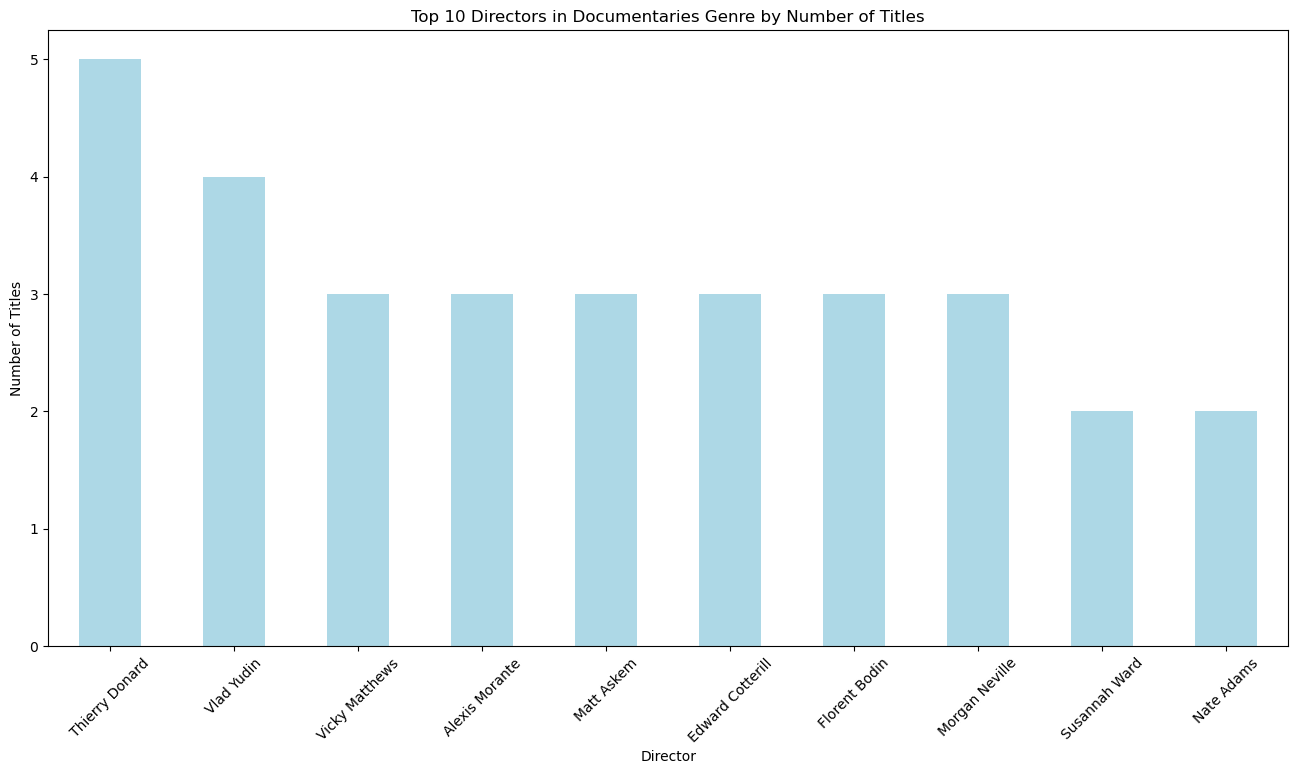

In [11]:

def plot_top_directors_by_genre(genre, color):
    genre_filtered = df[df['listed_in'].str.contains(genre, na=False)]
    directors_genre_series = genre_filtered['director'].str.split(',').explode().str.strip()
    top_directors_genre = directors_genre_series.value_counts().head(10)
    plt.figure(figsize=(16, 8))
    top_directors_genre.plot(kind='bar', color=color)
    plt.title(f"Top 10 Directors in {genre} Genre by Number of Titles")
    plt.xlabel("Director")
    plt.ylabel("Number of Titles")
    plt.xticks(rotation=45)
    plt.show()


plot_top_directors_by_genre('Drama', 'lightgreen')
plot_top_directors_by_genre('Documentaries', 'lightblue')

7. Genre-Country Correlation

    A heatmap to show the relationship between countries and genres.

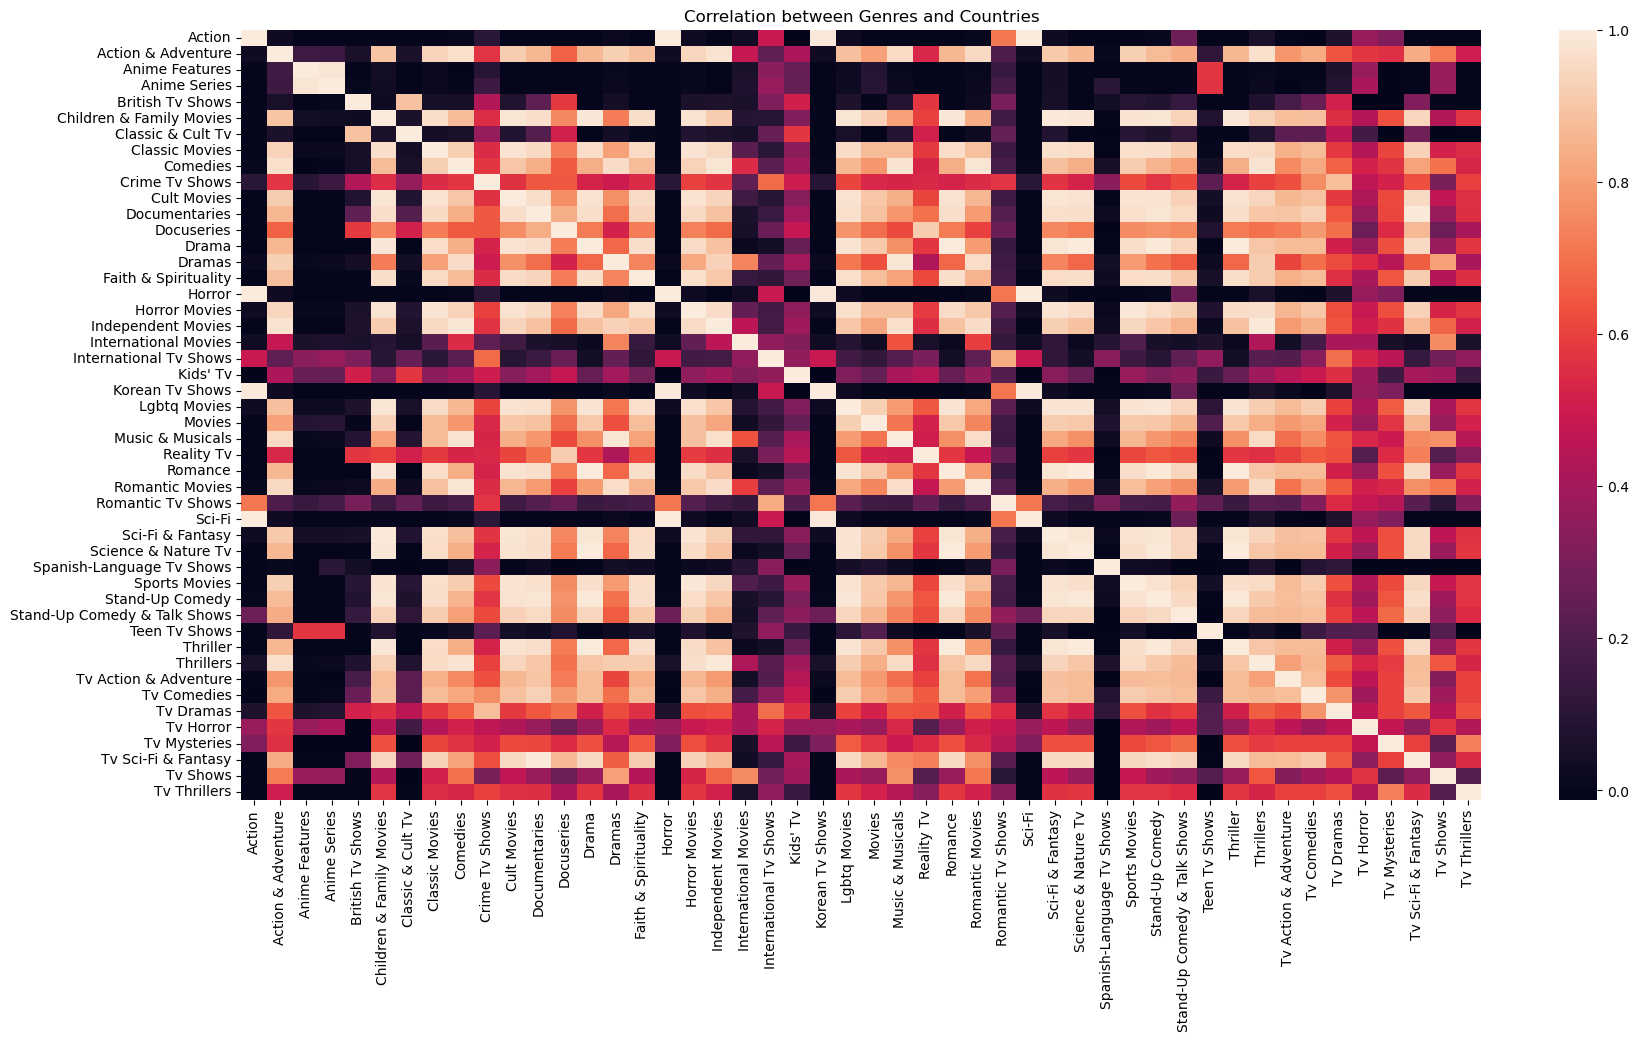

In [12]:

genre_columns = df['listed_in'].str.get_dummies(sep=', ')
country_genre_data = pd.concat([df['country'], genre_columns], axis=1)
country_genre_counts = country_genre_data.groupby('country').sum()
correlation_matrix = country_genre_counts.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix)
plt.title("Correlation between Genres and Countries")
plt.show()


8. Ratings by Genre
Analyzing the distribution of ratings across genres.

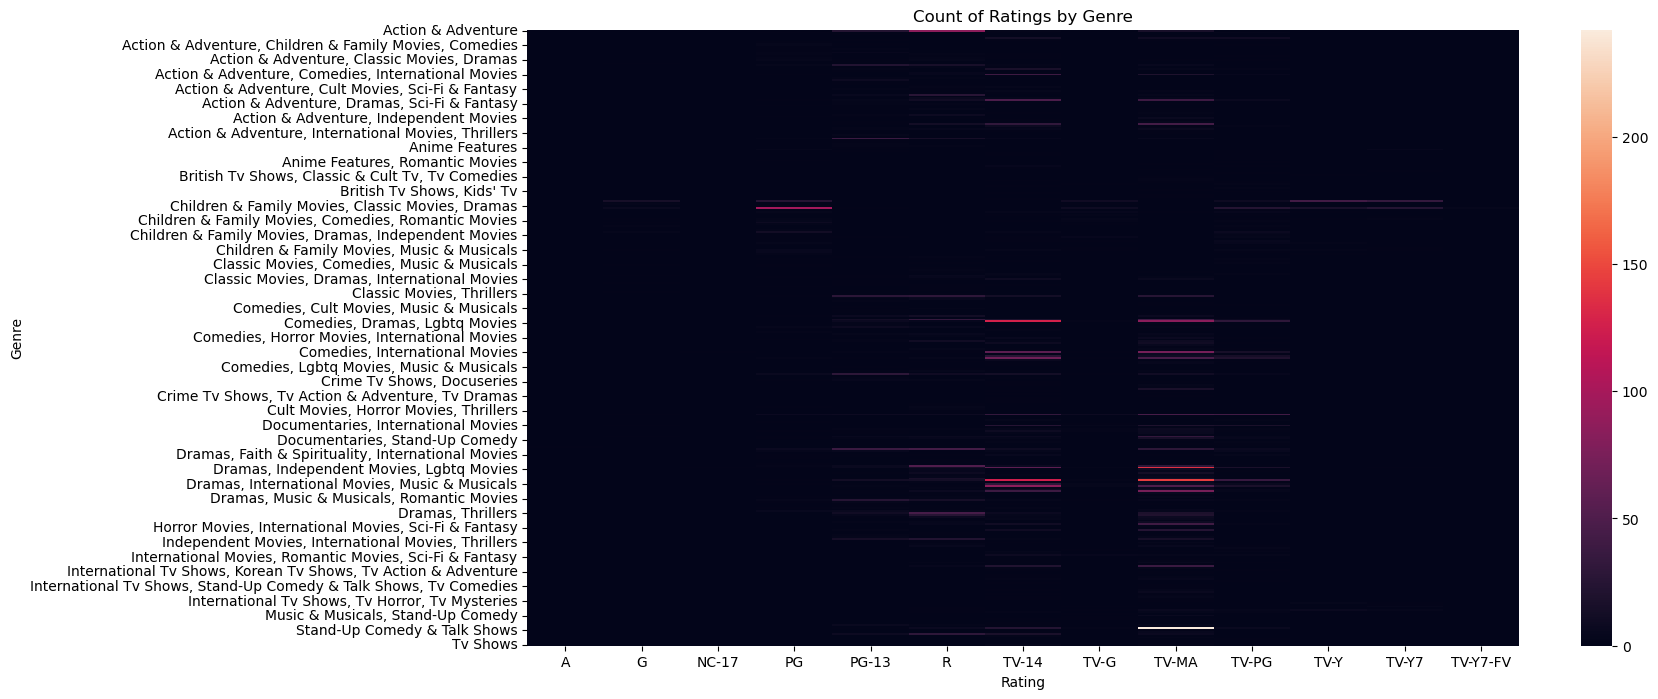

In [13]:

ratings_by_genre = df.groupby(['listed_in', 'rating']).size().unstack(fill_value=0)
plt.figure(figsize=(16, 8))
sns.heatmap(ratings_by_genre)
plt.title("Count of Ratings by Genre")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.show()

9. Type Distribution:

Pie chart or donut chart to show the distribution of movies vs. TV shows:



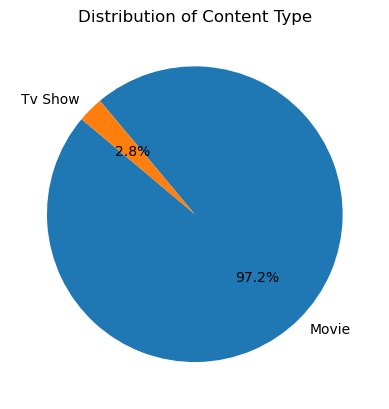

In [14]:
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Content Type")
plt.show()


10. Trend by Country:

A stacked bar chart showing yearly releases broken down by top countries:

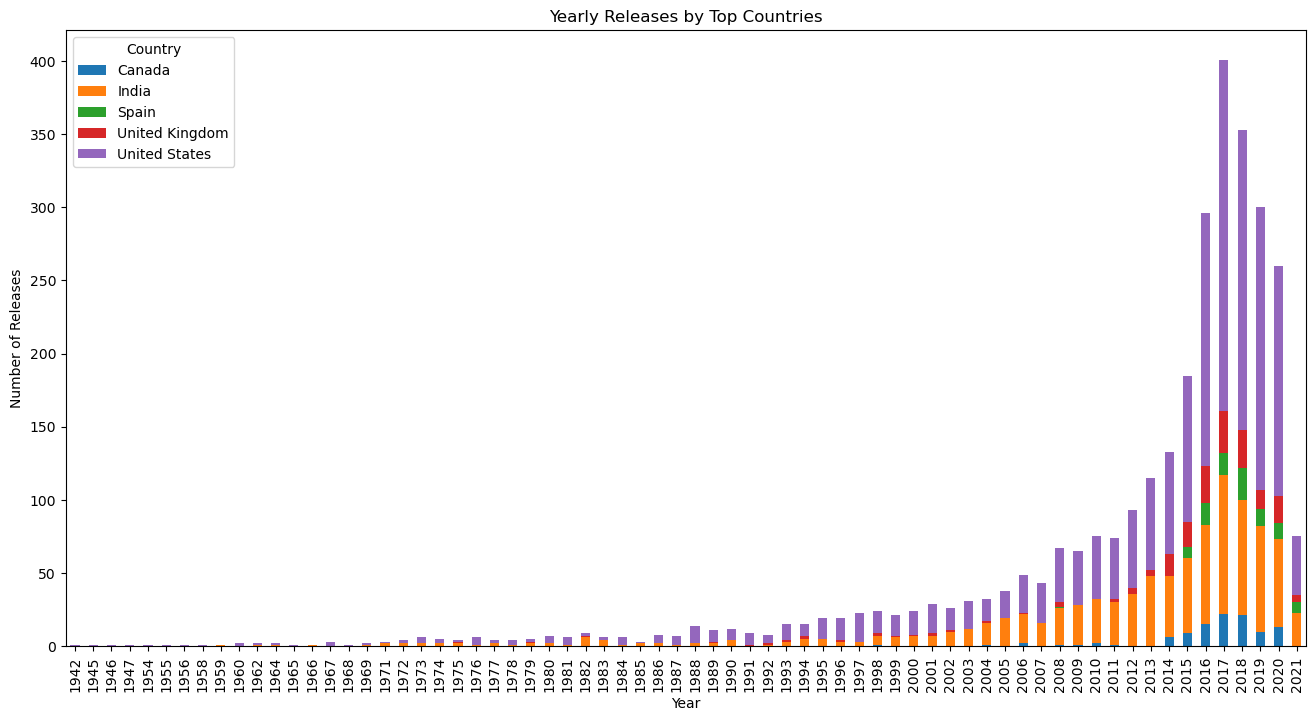

In [15]:
top_countries = df['country'].value_counts().head(5).index
country_year_trends = df[df['country'].isin(top_countries)].groupby(['release_year', 'country']).size().unstack()
country_year_trends.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title("Yearly Releases by Top Countries")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.legend(title="Country")
plt.show()


Summary

 This script provides insights into Netflix content trends, top contributors, and genre distributions. It utilizes pandas for data manipulation, matplotlib and seaborn for visualizations, and focuses on actionable trends like:


Release patterns over the years and months.

Top-performing directors and cast members.

Genre popularity and correlations with countries.

Ratings trends across genres.

Feel free to fork this repository, contribute, or reach out for collaboration